In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io.arff import loadarff 
from scipy.io import loadmat

In [2]:
def to01(word):
    if str(word) == "b'yes'":
        return 1
    else:
        return 0
    
    
def mapper(name):
    if type(name) is str and name.startswith('att'):
        return int(name[3:]) - 1
    else:
        return name

raw_data = loadarff('ALOI.arff')
df1 = pd.DataFrame(raw_data[0])
df1.drop_duplicates(inplace = True)
df1['outlier'] = df1['outlier'].apply(to01)
df1 = df1.drop('id', axis = 1)
df1.rename(columns=mapper, inplace = True)
df1.rename(columns={"outlier": 166}, inplace = True)
df1.sort_index(axis=1, inplace=True)
df1.rename(columns={166: "outlier"}, inplace = True)
df1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,outlier
0,0.872812,0.000005,0.000000,0.000036,0.000000,0.000000,0.0,0.000000,0.000000,0.050327,...,0.014212,0.000104,0.0,0.025490,0.004937,0.000011,0.000054,0.006804,0.015385,1
1,0.975206,0.000000,0.000000,0.000651,0.000000,0.000000,0.0,0.000000,0.000000,0.007039,...,0.000000,0.000000,0.0,0.004853,0.001582,0.000000,0.000000,0.000201,0.000000,1
2,0.963777,0.000000,0.000000,0.002005,0.000000,0.000000,0.0,0.000000,0.000000,0.006642,...,0.000000,0.000000,0.0,0.007828,0.002523,0.000000,0.000393,0.003800,0.000000,1
3,0.973246,0.000000,0.000000,0.000556,0.000000,0.000000,0.0,0.000000,0.000000,0.008979,...,0.000000,0.000000,0.0,0.004392,0.000170,0.000000,0.000000,0.000007,0.000000,1
4,0.960720,0.000000,0.000000,0.000656,0.000000,0.000000,0.0,0.000000,0.000000,0.013319,...,0.000000,0.000000,0.0,0.010299,0.000561,0.000000,0.000084,0.000264,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.967972,0.000319,0.000000,0.000520,0.000267,0.000002,0.0,0.000000,0.000000,0.000746,...,0.000000,0.000000,0.0,0.000043,0.000170,0.000002,0.000043,0.004716,0.004415,0
49996,0.974542,0.000472,0.000000,0.000723,0.000380,0.000007,0.0,0.000000,0.000000,0.000821,...,0.000000,0.000000,0.0,0.000038,0.000081,0.000000,0.000047,0.004734,0.001964,0
49997,0.980091,0.000671,0.000000,0.000845,0.000402,0.000011,0.0,0.000002,0.000000,0.000497,...,0.000000,0.000000,0.0,0.000054,0.000149,0.000000,0.000052,0.003603,0.002055,0
49998,0.981312,0.000830,0.000002,0.000285,0.000368,0.000041,0.0,0.000002,0.000005,0.000355,...,0.000000,0.000000,0.0,0.000106,0.000158,0.000029,0.000066,0.003493,0.002459,0


In [5]:
mat = loadmat('musk.mat')  # load mat-file
df2 = pd.DataFrame(np.hstack((mat['X'], mat['y'])))
df2.drop_duplicates(inplace = True)
df2.rename(columns={166: "outlier"}, inplace = True)
df2

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,outlier
0,46.0,-108.0,-60.0,-69.0,-117.0,49.0,38.0,-161.0,-8.0,5.0,...,-308.0,52.0,-7.0,39.0,126.0,156.0,-50.0,-112.0,96.0,1.0
1,41.0,-188.0,-145.0,22.0,-117.0,-6.0,57.0,-171.0,-39.0,-100.0,...,-59.0,-2.0,52.0,103.0,136.0,169.0,-61.0,-136.0,79.0,1.0
2,46.0,-194.0,-145.0,28.0,-117.0,73.0,57.0,-168.0,-39.0,-22.0,...,-134.0,-154.0,57.0,143.0,142.0,165.0,-67.0,-145.0,39.0,1.0
3,41.0,-188.0,-145.0,22.0,-117.0,-7.0,57.0,-170.0,-39.0,-99.0,...,-60.0,-4.0,52.0,104.0,136.0,168.0,-60.0,-135.0,80.0,1.0
4,41.0,-188.0,-145.0,22.0,-117.0,-7.0,57.0,-170.0,-39.0,-99.0,...,-60.0,-4.0,52.0,104.0,137.0,168.0,-60.0,-135.0,80.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,63.0,-172.0,27.0,-50.0,-109.0,155.0,-146.0,183.0,-207.0,-38.0,...,-69.0,164.0,9.0,25.0,83.0,189.0,-38.0,-121.0,140.0,0.0
3058,43.0,87.0,30.0,-53.0,-117.0,160.0,-158.0,158.0,-196.0,-22.0,...,-58.0,164.0,-2.0,134.0,113.0,175.0,-67.0,-160.0,-23.0,0.0
3059,43.0,87.0,31.0,-50.0,-117.0,42.0,-95.0,83.0,-201.0,-29.0,...,-62.0,39.0,-1.0,134.0,112.0,174.0,-67.0,-159.0,-22.0,0.0
3060,43.0,63.0,41.0,-78.0,-117.0,69.0,-163.0,158.0,-237.0,-11.0,...,-3.0,155.0,59.0,61.0,14.0,279.0,-69.0,-270.0,-5.0,0.0


In [6]:
mat = loadmat('mammography.mat')  # load mat-file
df3 = pd.DataFrame(np.hstack((mat['X'], mat['y'])))
df3.drop_duplicates(inplace = True)
df3.rename(columns={6: "outlier"}, inplace = True)
df3

,0,1,2,3,4,5,outlier
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,0.0
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,0.0
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,0.0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0.0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0.0
...,...,...,...,...,...,...,...
11178,-0.250012,-0.377300,-0.321142,1.269157,3.652984,1.092791,1.0
11179,0.281343,-0.417112,-0.366224,0.851010,2.789649,1.345700,1.0
11180,1.204988,1.763724,-0.501468,1.562408,6.489072,0.931294,1.0
11181,0.736644,-0.222474,-0.050653,1.509665,0.539269,1.315229,1.0


In [7]:
# итак, все признаки численные, данные приведены к одинаковому виду

In [8]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,outlier
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.899869,0.002935,0.000162,0.002165,0.001503,0.000455,0.000028,0.000044,0.000125,0.019704,...,0.005664,0.000142,0.000002,0.008980,0.004107,0.000130,0.005521,0.009219,0.015468,0.030160
std,0.080882,0.012711,0.002093,0.010481,0.006335,0.003146,0.000781,0.000521,0.001526,0.027425,...,0.019290,0.001507,0.000104,0.019875,0.009557,0.000791,0.016900,0.017319,0.031761,0.171029
min,0.408429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.855332,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.002150,...,0.000000,0.000000,0.000000,0.000029,0.000136,0.000000,0.000000,0.000267,0.000170,0.000000
50%,0.922028,0.000020,0.000000,0.000151,0.000016,0.000000,0.000000,0.000000,0.000000,0.009630,...,0.000020,0.000000,0.000000,0.000884,0.000990,0.000011,0.000025,0.002317,0.001901,0.000000
75%,0.961534,0.000504,0.000000,0.000816,0.000373,0.000000,0.000000,0.000000,0.000000,0.025960,...,0.002215,0.000014,0.000000,0.007908,0.003954,0.000075,0.001307,0.010222,0.015320,0.000000
max,1.000000,0.246001,0.085418,0.389667,0.140847,0.105959,0.154695,0.027271,0.057825,0.359963,...,0.295033,0.087454,0.011022,0.220258,0.210542,0.056392,0.246541,0.194675,0.327949,1.000000


In [9]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,outlier
count,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,...,3062.000000,3062.000000,3062.00000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000
mean,44.223383,-101.876878,-55.032332,22.677335,-111.662639,33.094056,-28.531352,45.258654,-100.699869,-42.054540,...,-171.247551,-75.411822,-30.61757,60.536251,97.852384,203.885369,-59.675702,-172.478119,49.554540,0.031679
std,10.766040,97.809986,73.098439,87.523003,27.791616,85.511259,130.543428,56.410995,122.022105,79.640215,...,111.129032,138.631664,49.03064,88.000303,33.433904,33.549452,12.263616,43.879680,69.635074,0.175172
min,28.000000,-199.000000,-164.000000,-114.000000,-117.000000,-157.000000,-170.000000,-174.000000,-244.000000,-187.000000,...,-314.000000,-217.000000,-134.00000,-119.000000,-7.000000,147.000000,-73.000000,-308.000000,-29.000000,0.000000
25%,37.000000,-187.000000,-126.000000,-55.000000,-117.000000,-23.000000,-160.000000,11.000000,-226.000000,-102.000000,...,-263.000000,-206.000000,-63.00000,-18.000000,82.000000,178.000000,-70.000000,-191.000000,-12.000000,0.000000
50%,43.000000,-138.000000,-64.000000,10.000000,-117.000000,57.000000,-26.500000,49.000000,-86.000000,-42.000000,...,-221.000000,-148.000000,-24.00000,64.500000,102.000000,201.000000,-66.000000,-162.000000,4.000000,0.000000
75%,47.000000,-44.000000,25.000000,109.750000,-116.000000,86.000000,71.000000,72.000000,-22.000000,2.000000,...,-71.000000,51.750000,-1.00000,144.000000,120.000000,215.000000,-48.000000,-147.000000,129.000000,0.000000
max,186.000000,90.000000,52.000000,156.000000,293.000000,200.000000,217.000000,234.000000,147.000000,231.000000,...,94.000000,179.000000,172.00000,269.000000,289.000000,315.000000,-37.000000,-112.000000,154.000000,1.000000


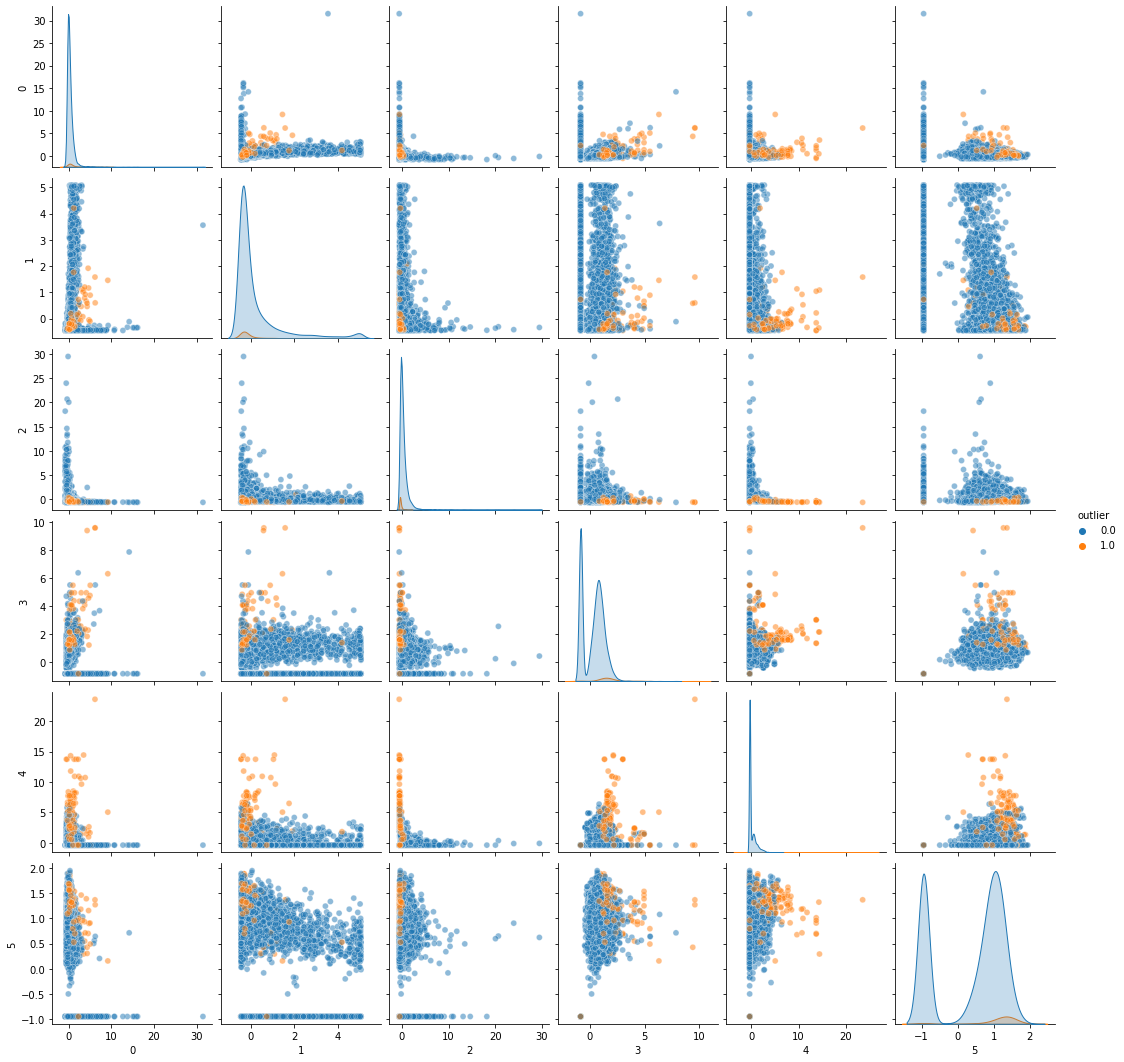

In [10]:
sns.pairplot(df3, hue = 'outlier', plot_kws={'alpha':0.5})

In [9]:
# видим, что больше всего на то, является ли элемент выбросом, влияют признаки 2 и 4
# для двух других наборов данных признаков и объектов слишком много, чтобы построить качественный pairplot

In [11]:
def draw_sns_corr_matrix(df: pd.DataFrame) -> None:
    sns.heatmap(df.corr() * (np.abs(df.corr()) > 0.3))

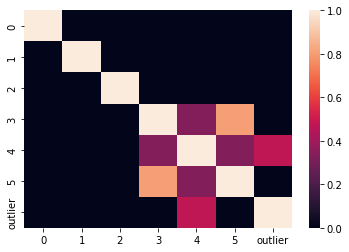

In [12]:
draw_sns_corr_matrix(df3) # видим какие пары признаков коррелируют, в частности видим некоторую корреляцию outlier
# хоть и корреляцию с бинарным признаком считать не очень круто

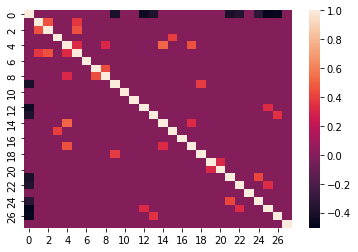

In [57]:
draw_sns_corr_matrix(df1)
# в основном не коррелирует

<AxesSubplot: xlabel='1', ylabel='Count'>

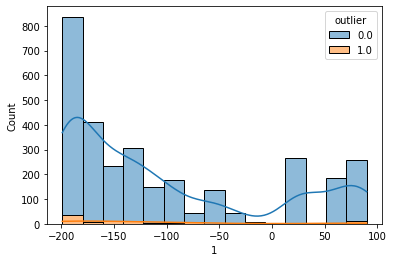

In [14]:
sns.histplot(df2, x = 1, hue = 'outlier', multiple="stack", bins = 'auto', kde = True)

<AxesSubplot:xlabel='2', ylabel='Count'>

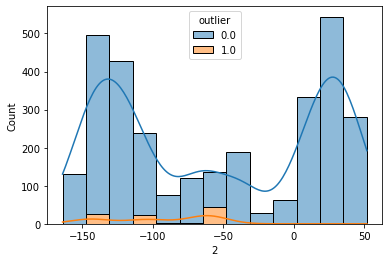

In [34]:
sns.histplot(df2, x = 2, hue = 'outlier', multiple="stack", bins = 'auto', kde = True)

<AxesSubplot: xlabel='3', ylabel='Count'>

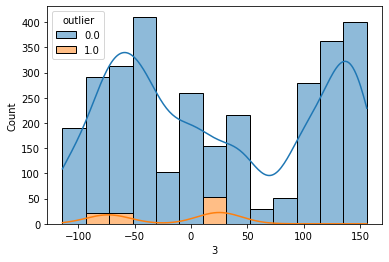

In [15]:
sns.histplot(df2, x = 3, hue = 'outlier', multiple="stack", bins = 'auto', kde = True)

<AxesSubplot: xlabel='5', ylabel='Count'>

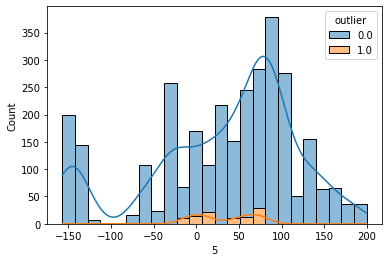

In [16]:
sns.histplot(df2, x = 5, hue = 'outlier', multiple="stack", bins = 'auto', kde = True)

In [25]:
# в целом видим, что для вторых данных выбросам характерны определенные значения признаков

<AxesSubplot: xlabel='7', ylabel='Count'>

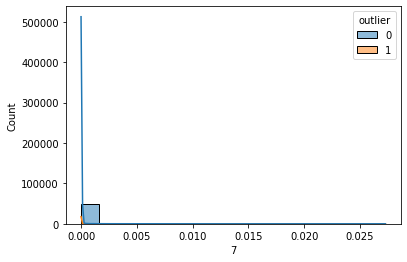

In [17]:
sns.histplot(df1, x = 7, hue = 'outlier', multiple="stack", bins = 'auto', kde = True)

<AxesSubplot: xlabel='8', ylabel='Count'>

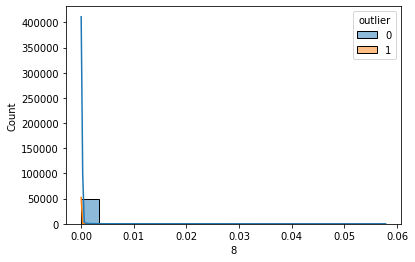

In [18]:
sns.histplot(df1, x = 8, hue = 'outlier', multiple="stack", bins = 'auto', kde = True)

<AxesSubplot: xlabel='9', ylabel='Count'>

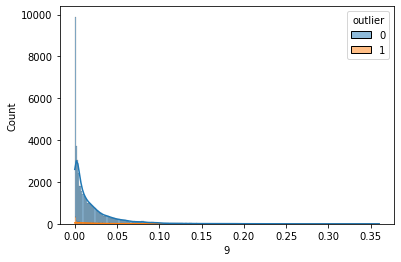

In [19]:
sns.histplot(df1, x = 9, hue = 'outlier', multiple="stack", bins = 'auto', kde = True)

In [45]:
# видим, что для первых данных характерно околонулевое значение по большинству признаков.
# непонятно, насколько это хорошие для нас данные. тем более что наблюдений там на порядок больше, чем в других

In [55]:
dfs = [df1, df2, df3]

In [56]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,outlier
count,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,...,3062.000000,3062.000000,3062.00000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000,3062.000000
mean,44.223383,-101.876878,-55.032332,22.677335,-111.662639,33.094056,-28.531352,45.258654,-100.699869,-42.054540,...,-171.247551,-75.411822,-30.61757,60.536251,97.852384,203.885369,-59.675702,-172.478119,49.554540,0.031679
std,10.766040,97.809986,73.098439,87.523003,27.791616,85.511259,130.543428,56.410995,122.022105,79.640215,...,111.129032,138.631664,49.03064,88.000303,33.433904,33.549452,12.263616,43.879680,69.635074,0.175172
min,28.000000,-199.000000,-164.000000,-114.000000,-117.000000,-157.000000,-170.000000,-174.000000,-244.000000,-187.000000,...,-314.000000,-217.000000,-134.00000,-119.000000,-7.000000,147.000000,-73.000000,-308.000000,-29.000000,0.000000
25%,37.000000,-187.000000,-126.000000,-55.000000,-117.000000,-23.000000,-160.000000,11.000000,-226.000000,-102.000000,...,-263.000000,-206.000000,-63.00000,-18.000000,82.000000,178.000000,-70.000000,-191.000000,-12.000000,0.000000
50%,43.000000,-138.000000,-64.000000,10.000000,-117.000000,57.000000,-26.500000,49.000000,-86.000000,-42.000000,...,-221.000000,-148.000000,-24.00000,64.500000,102.000000,201.000000,-66.000000,-162.000000,4.000000,0.000000
75%,47.000000,-44.000000,25.000000,109.750000,-116.000000,86.000000,71.000000,72.000000,-22.000000,2.000000,...,-71.000000,51.750000,-1.00000,144.000000,120.000000,215.000000,-48.000000,-147.000000,129.000000,0.000000
max,186.000000,90.000000,52.000000,156.000000,293.000000,200.000000,217.000000,234.000000,147.000000,231.000000,...,94.000000,179.000000,172.00000,269.000000,289.000000,315.000000,-37.000000,-112.000000,154.000000,1.000000


In [48]:
from sklearn import metrics


def make_z_score_prediction_by_one_column(data: str):
    normed = (data - data.mean()) / data.std()
    return np.absolute(normed) > 3


# calculate confusion matrix by best column (except "outlier")
for i, df in enumerate(dfs):
    print(f"df{i + 1}:")
    best_score = 0
    for col in df.columns:
        if col == "outlier":
            break
        
        z_score_pred = make_z_score_prediction_by_one_column(df[col])
        f1_score = metrics.f1_score(df["outlier"], z_score_pred)
        
        if f1_score > best_score:
            best_score = f1_score
            best_col = col
            best_z_score_pred = z_score_pred
        
    print(f"for column {best_col} report is\n") #precision, recall are {metrics.precision_recall_fscore_support(temp_df['outlier'], z_score_pred)}")
    print(metrics.classification_report(df["outlier"], best_z_score_pred))

df1:
for column 0 report is

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     48492
           1       0.15      0.04      0.06      1508

    accuracy                           0.96     50000
   macro avg       0.56      0.52      0.52     50000
weighted avg       0.95      0.96      0.95     50000

df2:
for column 13 report is

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2965
         1.0       1.00      1.00      1.00        97

    accuracy                           1.00      3062
   macro avg       1.00      1.00      1.00      3062
weighted avg       1.00      1.00      1.00      3062

df3:
for column 4 report is

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7595
         1.0       0.65      0.35      0.46       254

    accuracy                           0.97      7849
   macro avg       0.81      0.67      0

In [54]:
arr = np.absolute((df2[13] - df2[13].mean()) / df2[13].std()) > 3
(df2["outlier"] == arr).all()
# :)

True

Просто z-score на лучшей колонке не очень решает задачу (показал себя не так плохо на df2, где много колонок, но на остальных плохо)

In [ ]:
# посчитаем средний z-score для выбросов и для обычных элементов

In [58]:
from scipy import stats


def calculate_abs_z_score(df: pd.DataFrame, hue: str = "outlier"):
    z_scored = stats.zscore(df)
    outlier = df[hue].astype(bool)    
    return np.abs(z_scored[~outlier]), np.abs(z_scored[outlier])
 

print("Not outliers vs outlier")
print("Mean")
for i, temp_df in enumerate(dfs):
    norm_stats, outlier_stats = calculate_abs_z_score(temp_df)
    print(f"df{i + 1}:   {np.mean(norm_stats.to_numpy())} | {np.mean(outlier_stats.to_numpy())}")


print()
print("Median")
for i, temp_df in enumerate(dfs):
    norm_stats, outlier_stats = calculate_abs_z_score(temp_df)
    print(f"df{i + 1}, median: {np.mean(norm_stats.median())} | {np.mean(outlier_stats.median())}")

Not outliers vs outlier
Mean
df1:   0.3475167747225723 | 0.5786842262544762
df2:   0.7921049670501058 | 1.135829262433263
df3:   0.5886203391767447 | 1.7807486277701146

Median
df1, median: 0.25208383641800103 | 0.45287535745248053
df2, median: 0.7089722723587628 | 1.0669431181969258
df3, median: 0.5106288467733547 | 1.569417199690127
